# Aerofit - Descriptive Statistics and probability

**About Aerofit:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business problem:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Checking datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Finding Unique values in each column

In [ ]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(column, ":" , unique_count)


Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


Ensuring we have no NaN values in the dataframe

In [ ]:
df.isna().isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The overall shape and statistical summary of the dataframe

In [ ]:
df.shape

(180, 9)

In [ ]:
summary = df.describe()
summary

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Graphical box plot representation of outliers in various columns



Text(0.5, 1.0, 'Boxplot of variable "Miles"')

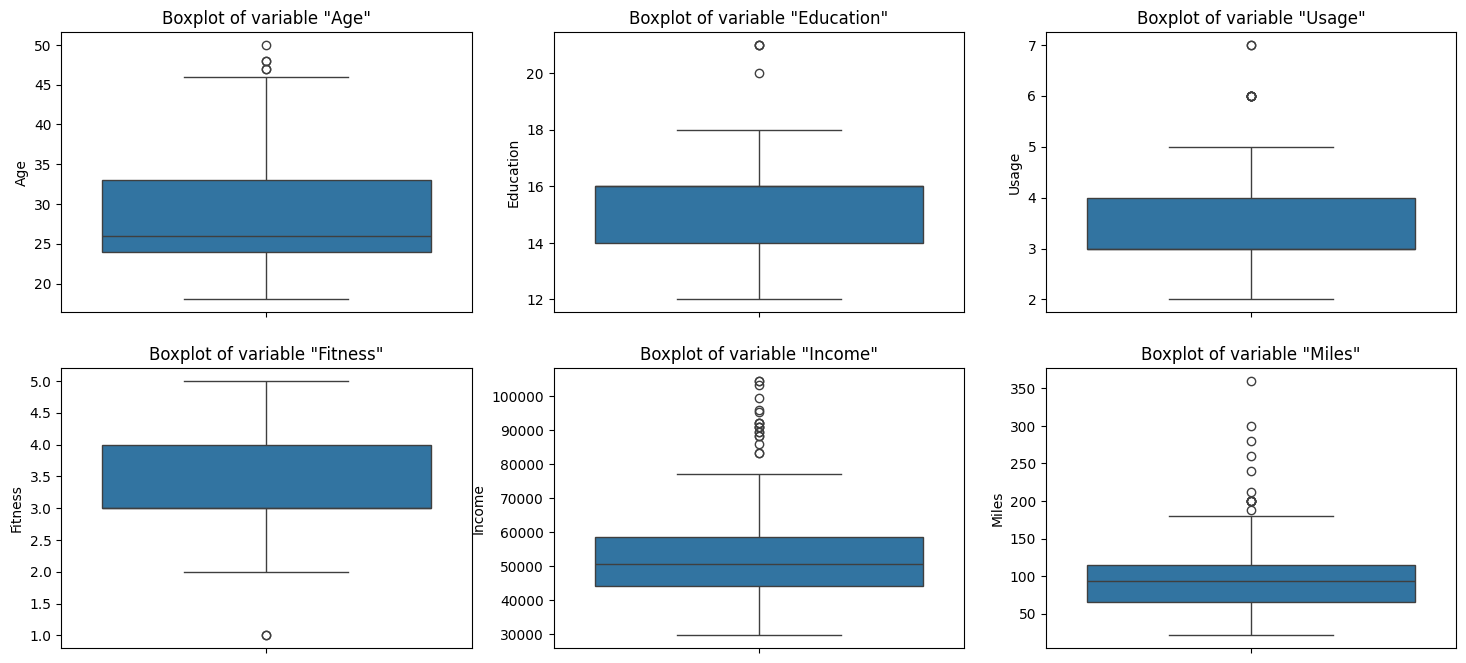

In [ ]:
plt.figure(figsize =(18,8))
plt.subplot(2,3,1)
sns.boxplot(data = df.Age)
plt.title('Boxplot of variable "Age"')

plt.subplot(2,3,2)
sns.boxplot(data = df.Education)
plt.title('Boxplot of variable "Education"')

plt.subplot(2,3,3)
sns.boxplot(data = df.Usage)
plt.title('Boxplot of variable "Usage"')

plt.subplot(2,3,4)
sns.boxplot(data = df.Fitness)
plt.title('Boxplot of variable "Fitness"')

plt.subplot(2,3,5)
sns.boxplot(data = df.Income)
plt.title('Boxplot of variable "Income"')

plt.subplot(2,3,6)
sns.boxplot(data = df.Miles)
plt.title('Boxplot of variable "Miles"')

Calculation of interquartile range

In [ ]:
Q1 = summary.loc["25%"]
Q3 = summary.loc["75%"]
IQR = Q3 - Q1
print(IQR)


Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64


Calculation of Extreme boundaries

In [ ]:
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

bounds_df = pd.DataFrame({"LowerBound" :Lower_bound, "UpperBound" :Upper_bound})
print(bounds_df)

           LowerBound  UpperBound
Age            10.500      46.500
Education      11.000      19.000
Usage           1.500       5.500
Fitness         1.500       5.500
Income      22144.875   80581.875
Miles          -7.125     187.875


DataFrame of Lowboundary outliers

(i) Fitness outliers

In [ ]:
fitness_outliers = (df['Fitness'] < Lower_bound['Fitness'])
fitness_outliers_df = df[fitness_outliers]
fitness_outliers_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


DataFrames of Upperboundary outliers

(i) Age outliers

In [ ]:
Age_outlier = (df['Age'] > Upper_bound['Age'])
Age_outlier_df = df[Age_outlier]
Age_outlier_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


(ii) Education outliers

In [ ]:
Education_outlier = (df['Education'] > Upper_bound['Education'])
Education_outlier_df = df[Education_outlier]
Education_outlier_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


(iii) Usage outliers

In [ ]:
Usage_outlier = (df['Usage'] > Upper_bound['Usage'])
Usage_outlier_df = df[Usage_outlier]
Usage_outlier_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


(iv) Income outliers

In [ ]:
Income_outlier = (df['Income'] > Upper_bound['Income'])
Income_outlier_df = df[Income_outlier]
Income_outlier_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


(v) Miles outliers

In [ ]:
Miles_outlier = (df['Miles'] > Upper_bound['Miles'])
Miles_outlier_df = df[Miles_outlier]
Miles_outlier_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


DataFrame of both upperbounds and lowerbounds outliers combined

In [ ]:
outliers = ((df < Lower_bound) | (df > Upper_bound)).any(axis=1)
potential_outliers = df[outliers]
potential_outliers

<ipython-input-70-93a8ff5e1b21>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < Lower_bound) | (df > Upper_bound)).any(axis=1)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
23,KP281,24,Female,16,Partnered,5,5,44343,188
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
84,KP481,21,Female,14,Partnered,5,4,34110,212
117,KP481,31,Female,18,Single,2,1,65220,21
139,KP481,48,Male,16,Partnered,2,3,57987,64
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200


Count of Upper bounds and Lower bounds outliers

In [ ]:
outliers_lower = (df < Lower_bound).sum()
outliers_upper = (df > Upper_bound).sum()
total_outliers = outliers_lower  + outliers_upper

ouliers_count_df = pd.DataFrame({"LowerBound_outliers" :outliers_lower, "UpperBound_outliers" :outliers_upper, "Total" : total_outliers})
print(ouliers_count_df)

               LowerBound_outliers  UpperBound_outliers  Total
Age                              0                    5      5
Education                        0                    4      4
Fitness                          2                    0      2
Gender                           0                    0      0
Income                           0                   19     19
MaritalStatus                    0                    0      0
Miles                            0                   13     13
Product                          0                    0      0
Usage                            0                    9      9


<ipython-input-71-e2fa83975e56>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_lower = (df < Lower_bound).sum()
<ipython-input-71-e2fa83975e56>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_upper = (df > Upper_bound).sum()


Calculation of difference between mean and median

If the result is positive, it means the mean is higher than the median, and if it's negative, it means the mean is lower than the median.

In [ ]:
difference_between_Mean_and_Median = (summary.loc["mean"] - summary.loc["50%"])
difference_between_Mean_and_Median

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

Insight : While checking the outliers in the datset, we can pretty much observe each and every column are affected by it; But suprisingly, we have only one outlier catering to "Fitness" coluumn falls below lower boundary level, however rest of all columns have outliers exceeding their upper boundary level.

Recommednation: The Outliers in income levels, miles and Usage columns are huge, hence no erroneous conclusions should be made by considering these outliers in general average estimates of the sales of treadmills.

<<--------------------------------------------------------------------------->>

<<--------------------------------------------------------------------------->>

Analysis of the Dataset

1. Sum of Consumers using different treadmill types

Text(0.5, 1.0, 'sum of consumers using each each treadmill type')

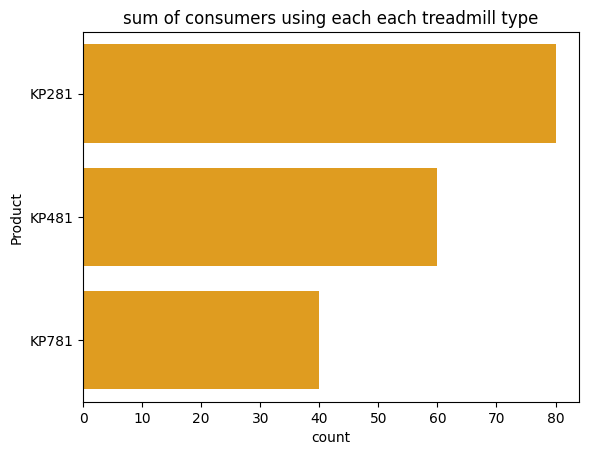

In [ ]:
sns.countplot(data = df.Product, color = 'orange')
plt.title("sum of consumers using each each treadmill type")

**Insight:** As you can observe from the bar chart above that the KP281, The basic model have huge number of sales(double the sales of premium type) and there after demand for type2 and type3 decreases at a diminishing rate based on their usecase and cost.

**Recommendation:** Majority of consumers still purchase the basic model, hence focus should be made to leverage this opportunity for scaling the sales of basic model KP281.

<<--------------------------------------------------------------------------->>

2. Consumer segmentation based on multiple variables

KP281 Product - customer segmentation and analysis

(i) segmentation based on Gender and Maritalstatus

In [ ]:
Count_of_KP281_products = df[df['Product'] == 'KP281'].groupby(['Gender', 'MaritalStatus'])['Product'].count()
Count_of_KP281_products = Count_of_KP281_products.sort_values(ascending = False).reset_index()
Count_of_KP281_products

,Gender,MaritalStatus,Product
0,Female,Partnered,27
1,Male,Partnered,21
2,Male,Single,19
3,Female,Single,13


<ipython-input-75-fe98eade0974>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.barplot(data = Count_of_KP281_products, x = 'Gender' , y = 'Product', hue = 'MaritalStatus', color = 'r', width = 0.5)


Text(0.5, 1.0, 'sum of KP281 product segregated under gender and Marital status')

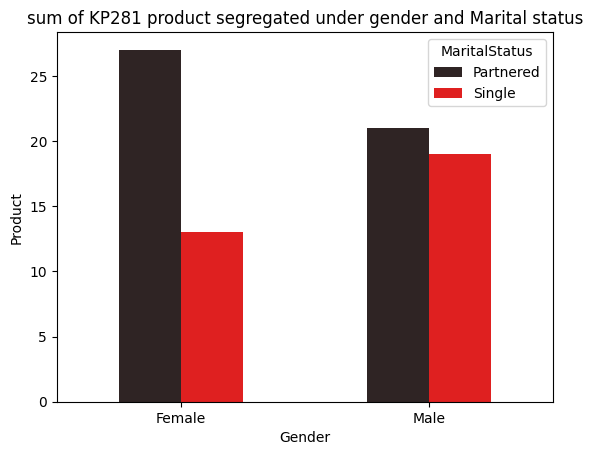

In [ ]:
sns.barplot(data = Count_of_KP281_products, x = 'Gender' , y = 'Product', hue = 'MaritalStatus', color = 'r', width = 0.5)
plt.title("sum of KP281 product segregated under gender and Marital status")

(ii) segmentation based on age

In [ ]:
Count_of_KP281_products = df[df['Product'] == 'KP281'].groupby(['Age'])['Product'].count()
Count_of_KP281_products = Count_of_KP281_products.sort_values(ascending = False).reset_index()
Count_of_KP281_products

,Age,Product
0,23,8
1,25,7
2,26,7
3,28,6
4,24,5
5,38,4
6,21,4
7,22,4
8,29,3
9,19,3


Text(0.5, 1.0, 'Sum of KP281 product grouped under age')

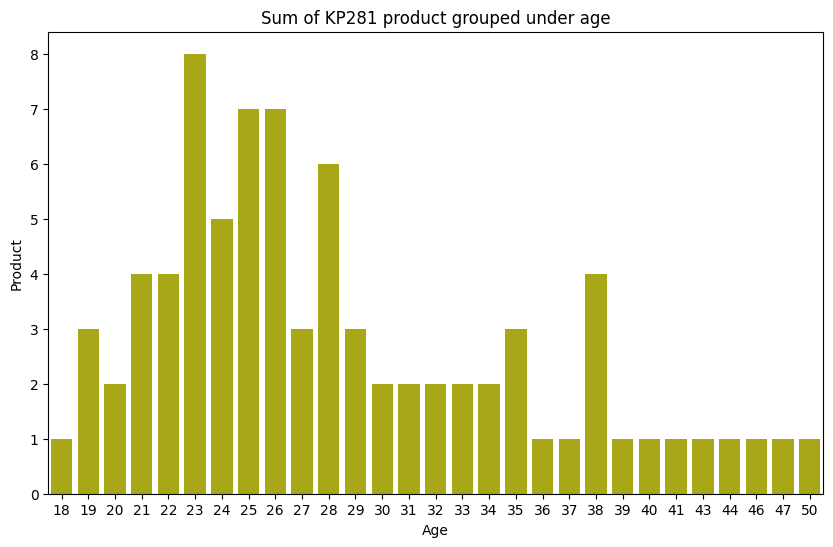

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data = Count_of_KP281_products, x = 'Age', y = 'Product', color = 'y')
plt.title("Sum of KP281 product grouped under age")

**Insight:** By observing the first graph we can infer that number of sales in the first model are equal for both male and female, and especially if we go into marital staus, for both cases we have partnered people dominating the singles in using the product KP281.

And from the second graph, we can infer that majority of the sales are from people who age between 21-29, and interestingly we also have a slight incremental demand from people who are 38 years old.

**Recommednation:** As this was a basic model with low cost and also caters to general fitness needs of young people who are between 20 -30, they will definitely show interest in purchasing it.

KP481 Product - customer segmentation and analysis

(i) Segmentation based on Gender and maritalstatus

In [ ]:
Count_of_KP481_products = df[df['Product'] == 'KP481'].groupby(['Gender', 'MaritalStatus'])['Product'].count()
Count_of_KP481_products  = Count_of_KP481_products .sort_values(ascending = False).reset_index()
Count_of_KP481_products

,Gender,MaritalStatus,Product
0,Male,Partnered,21
1,Female,Partnered,15
2,Female,Single,14
3,Male,Single,10


<ipython-input-26-c799ce69d406>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Blue'` for the same effect.

  sns.barplot(data = Count_of_KP481_products, x = 'Gender', y = 'Product', hue = 'MaritalStatus', color = 'Blue', width = 0.5)


Text(0.5, 1.0, 'sum of KP481 product segregated under Gender and Martial status')

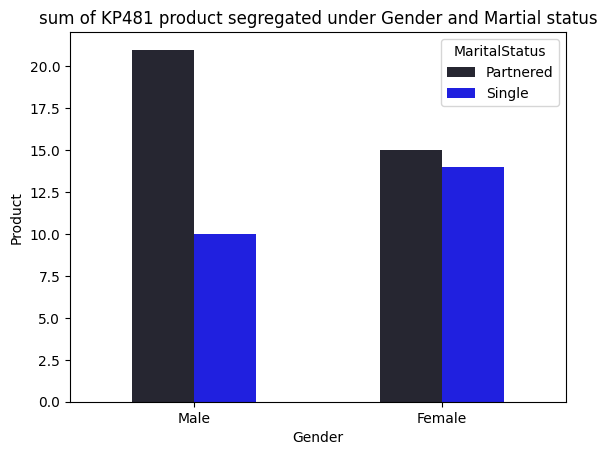

In [ ]:
sns.barplot(data = Count_of_KP481_products, x = 'Gender', y = 'Product', hue = 'MaritalStatus', color = 'Blue', width = 0.5)
plt.title("sum of KP481 product segregated under Gender and Martial status")

(ii) segmentation based of Age

In [ ]:
Count_of_KP481_products = df[df['Product'] == 'KP481'].groupby(['Age'])['Product'].count()
Count_of_KP481_products = Count_of_KP481_products.sort_values(ascending = False).reset_index()
Count_of_KP481_products

,Age,Product
0,25,11
1,23,7
2,33,5
3,35,4
4,31,3
5,21,3
6,24,3
7,26,3
8,40,3
9,20,3


Text(0.5, 1.0, 'Sum of KP481 product grouped under age')

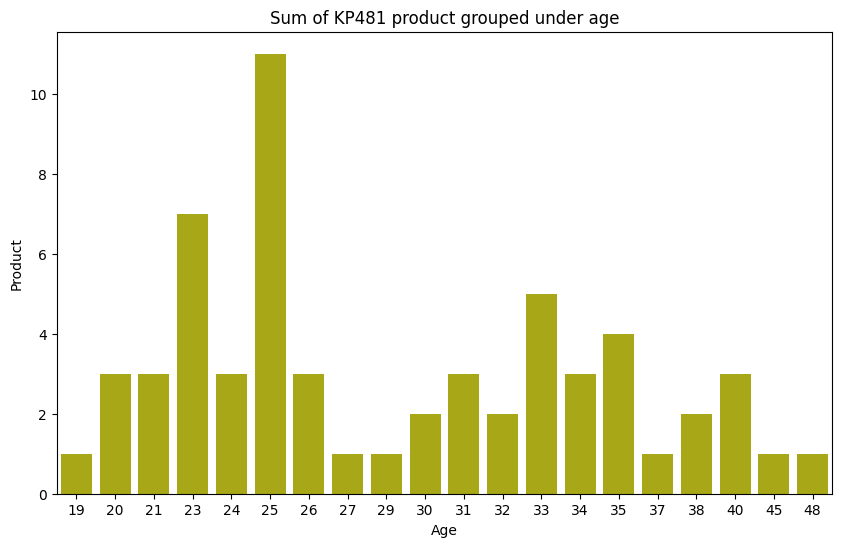

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data = Count_of_KP481_products, x = 'Age', y = 'Product', color = 'y')
plt.title("Sum of KP481 product grouped under age")

**Insight:** By observing the first graph we can infer that number of sales from men are slightly more than female, and especially if we go into marital staus, for both male and female, we have partnered people dominating the singles in using the product KP481.

And from the second graph, we can infer that majority of the sales are from people who are 25 years old. But, interestingly here on an average the sales were distributed across all ages.

**Recommednation:** As this was a medium model, people and age groups who are demanding this should have good income and fitness levels; Thus, suggesting this model to those segment of people who have these two main traits will improve the sales of this model KP481.

KP781 Product - customer segmentation and analysis

(i) segmentation based on Gender and Maritalstatus

In [ ]:
Count_of_KP781_products = df[df['Product'] == 'KP781'].groupby(['Gender', 'MaritalStatus'])['Product'].count()
Count_of_KP781_products  = Count_of_KP781_products .sort_values(ascending = False).reset_index()
Count_of_KP781_products

,Gender,MaritalStatus,Product
0,Male,Partnered,19
1,Male,Single,14
2,Female,Partnered,4
3,Female,Single,3


<ipython-input-78-6e420d315878>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Pink'` for the same effect.

  sns.barplot(data = Count_of_KP781_products, x = 'Gender', y = 'Product', hue = 'MaritalStatus', color = 'Pink', width = 0.5)


Text(0.5, 1.0, 'sum of KP781 segregated under Gender and Marital status')

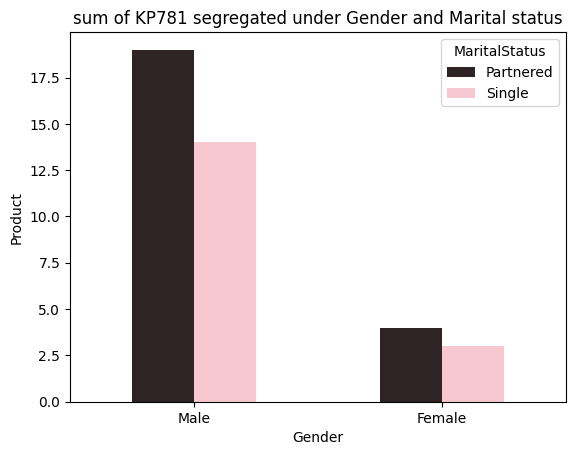

In [ ]:
sns.barplot(data = Count_of_KP781_products, x = 'Gender', y = 'Product', hue = 'MaritalStatus', color = 'Pink', width = 0.5)
plt.title("sum of KP781 segregated under Gender and Marital status")

Segmentation based on Age

In [ ]:
Count_of_KP781_products = df[df['Product'] == 'KP781'].groupby(['Age'])['Product'].count()
Count_of_KP781_products = Count_of_KP781_products.sort_values(ascending = False).reset_index()
Count_of_KP781_products

,Age,Product
0,25,7
1,24,4
2,22,3
3,27,3
4,28,3
5,30,3
6,23,3
7,26,2
8,29,2
9,40,1


Text(0.5, 1.0, 'Sum of KP781 product grouped under age')

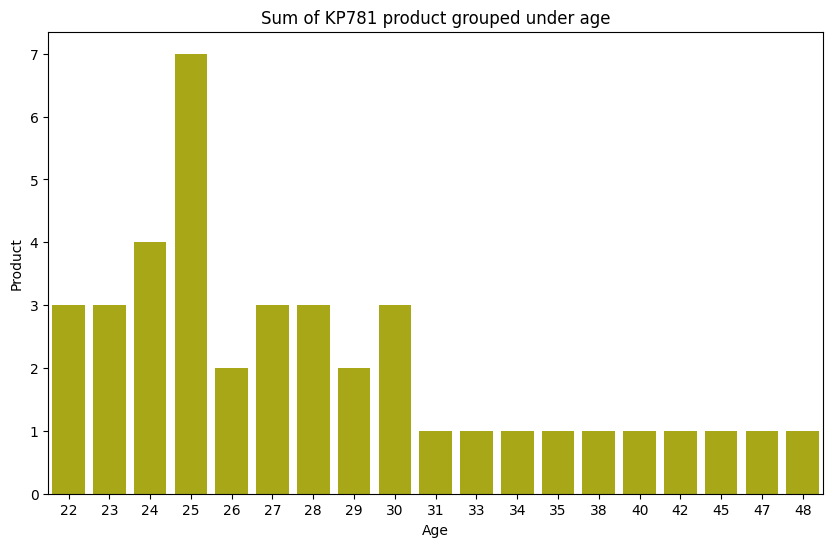

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data = Count_of_KP781_products, x = 'Age', y = 'Product', color = 'y')
plt.title("Sum of KP781 product grouped under age")

**Insight:** By observing the first graph we can infer that number of sales from men are significantly more than female, and especially if we go into marital staus, for both male and female, we have partnered people dominating the singles in using the product KP781.

And from the second graph, we can infer that majority of the sales are from people who are aged between 22 -30 years old. But, we also have a single machine demand form people who are aged between 31-48

**Recommednation:** As this was a Premium model, people and age groups who are demanding this should have excellent fitness levels and high end income levels; Thus, suggesting this model to those segment of people who have these two main traits will improve the sales of this model KP781.

<<--------------------------------------------------------------------------->>

Creation of age and Income labels

In [ ]:
age_bins = [18,22,26,30,34,38,42,46,50]
age_labels = ['18-22', '23-26', '27-30', '31-34', '35-38', '39-42', '43-46', '47-50']

df['Age_bracket'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels, right = False)

In [ ]:
income_bins = [29000, 39000, 49000, 59000, 69000, 79000, 89000, 99000, 109000]
income_labels = ['29000-39000', '39001-49000', '49001-59000', '59001-69000', '69001-79000', '79001-89000', '89001-99000', '99001-109000']

df['Income_lables'] = pd.cut(df['Income'], bins = income_bins, labels = income_labels, right = False)

3. Creation of Multi level contingency tables.

(i) Contingency table for columns like Gender and marital status to calculate marginal and conditional probability.

In [ ]:
contingency_table = pd.crosstab(index = [df['Product'], df['Gender'], df['MaritalStatus']], columns = 'Count', normalize = True).reset_index()
contingency_table

col_0,Product,Gender,MaritalStatus,Count
0,KP281,Female,Partnered,0.150000
1,KP281,Female,Single,0.072222
2,KP281,Male,Partnered,0.116667
3,KP281,Male,Single,0.105556
4,KP481,Female,Partnered,0.083333
5,KP481,Female,Single,0.077778
6,KP481,Male,Partnered,0.116667
7,KP481,Male,Single,0.055556
8,KP781,Female,Partnered,0.022222
9,KP781,Female,Single,0.016667


Marginal probabilty for gender

In [ ]:
marginal_gender_probs = contingency_table.groupby(['Product','Gender'])['Count'].sum() / contingency_table['Count'].sum()
marginal_gender_probs

Product  Gender
KP281    Female    0.222222
         Male      0.222222
KP481    Female    0.161111
         Male      0.172222
KP781    Female    0.038889
         Male      0.183333
Name: Count, dtype: float64

Conditional probability for gender

In [ ]:
conditional_gender_given_product = contingency_table.groupby(['Product', 'Gender'])['Count'].sum() / contingency_table.groupby('Product')['Count'].sum()
conditional_gender_given_product

Product  Gender
KP281    Female    0.500000
         Male      0.500000
KP481    Female    0.483333
         Male      0.516667
KP781    Female    0.175000
         Male      0.825000
Name: Count, dtype: float64

Marginal probability for Maritalstatus

In [ ]:
marginal_MaritalStatus_probs = contingency_table.groupby(['Product', 'MaritalStatus'])['Count'].sum() / contingency_table['Count'].sum()
marginal_MaritalStatus_probs

Product  MaritalStatus
KP281    Partnered        0.266667
         Single           0.177778
KP481    Partnered        0.200000
         Single           0.133333
KP781    Partnered        0.127778
         Single           0.094444
Name: Count, dtype: float64

Conditional probability for Maritalstatus

In [ ]:
conditional_marital_given_product = contingency_table.groupby(['Product', 'MaritalStatus'])['Count'].sum() / contingency_table.groupby('Product')['Count'].sum()
conditional_marital_given_product

Product  MaritalStatus
KP281    Partnered        0.600
         Single           0.400
KP481    Partnered        0.600
         Single           0.400
KP781    Partnered        0.575
         Single           0.425
Name: Count, dtype: float64

**Insight :** If we check the marginal/conditional probability for products demand based on **gender and Maritalstatus**, we can conclude that male dominated the overall sales, but individually in type1, both male an female stood equal, However coming to marital status; partnered people demanded more than singles.



(ii) Contingency table for columns like Age_bracket and Income_labels to calculate marginal and conditional probability.

In [ ]:
contingency_table = pd.crosstab(index = [df['Product'], df['Age_bracket'], df['Income_lables']], columns = 'Count', normalize = True).reset_index()
contingency_table

col_0,Product,Age_bracket,Income_lables,Count
0,KP281,18-22,29000-39000,0.055866
1,KP281,23-26,29000-39000,0.050279
2,KP281,23-26,39001-49000,0.078212
3,KP281,23-26,49001-59000,0.005587
4,KP281,27-30,29000-39000,0.005587
5,KP281,27-30,39001-49000,0.033520
6,KP281,27-30,49001-59000,0.061453
7,KP281,27-30,59001-69000,0.005587
8,KP281,31-34,39001-49000,0.022346
9,KP281,31-34,49001-59000,0.022346


Marginal probability for Age

In [ ]:
marginal_Age_probs = contingency_table.groupby(['Product','Age_bracket'])['Count'].sum() / contingency_table['Count'].sum()
marginal_Age_probs

Product  Age_bracket
KP281    18-22          0.055866
         23-26          0.134078
         27-30          0.106145
         31-34          0.044693
         35-38          0.039106
         39-42          0.039106
         43-46          0.011173
         47-50          0.011173
KP481    18-22          0.039106
         23-26          0.117318
         27-30          0.027933
         31-34          0.067039
         35-38          0.044693
         39-42          0.027933
         43-46          0.005587
         47-50          0.005587
KP781    18-22          0.000000
         23-26          0.094972
         27-30          0.055866
         31-34          0.027933
         35-38          0.011173
         39-42          0.011173
         43-46          0.011173
         47-50          0.011173
Name: Count, dtype: float64

Conditional probability for Age

In [ ]:
conditional_Age_given_product = contingency_table.groupby(['Product', 'Age_bracket'])['Count'].sum() / contingency_table.groupby('Product')['Count'].sum()
conditional_Age_given_product

Product  Age_bracket
KP281    18-22          0.126582
         23-26          0.303797
         27-30          0.240506
         31-34          0.101266
         35-38          0.088608
         39-42          0.088608
         43-46          0.025316
         47-50          0.025316
KP481    18-22          0.116667
         23-26          0.350000
         27-30          0.083333
         31-34          0.200000
         35-38          0.133333
         39-42          0.083333
         43-46          0.016667
         47-50          0.016667
KP781    18-22          0.000000
         23-26          0.425000
         27-30          0.250000
         31-34          0.125000
         35-38          0.050000
         39-42          0.050000
         43-46          0.050000
         47-50          0.050000
Name: Count, dtype: float64

Marginal probabilty for Income

In [ ]:
marginal_Income_probs = contingency_table.groupby(['Product','Income_lables'])['Count'].sum() / contingency_table['Count'].sum()
marginal_Income_probs

Product  Income_lables
KP281    29000-39000      0.117318
         39001-49000      0.150838
         49001-59000      0.139665
         59001-69000      0.033520
         69001-79000      0.000000
         79001-89000      0.000000
         89001-99000      0.000000
         99001-109000     0.000000
KP481    29000-39000      0.050279
         39001-49000      0.117318
         49001-59000      0.117318
         59001-69000      0.050279
         69001-79000      0.000000
         79001-89000      0.000000
         89001-99000      0.000000
         99001-109000     0.000000
KP781    29000-39000      0.000000
         39001-49000      0.016760
         49001-59000      0.044693
         59001-69000      0.027933
         69001-79000      0.027933
         79001-89000      0.027933
         89001-99000      0.055866
         99001-109000     0.022346
Name: Count, dtype: float64

Conditional probablity for Income

In [ ]:
conditional_Income_given_product = contingency_table.groupby(['Product', 'Income_lables'])['Count'].sum() / contingency_table.groupby('Product')['Count'].sum()
conditional_Income_given_product

Product  Income_lables
KP281    29000-39000      0.265823
         39001-49000      0.341772
         49001-59000      0.316456
         59001-69000      0.075949
         69001-79000      0.000000
         79001-89000      0.000000
         89001-99000      0.000000
         99001-109000     0.000000
KP481    29000-39000      0.150000
         39001-49000      0.350000
         49001-59000      0.350000
         59001-69000      0.150000
         69001-79000      0.000000
         79001-89000      0.000000
         89001-99000      0.000000
         99001-109000     0.000000
KP781    29000-39000      0.000000
         39001-49000      0.075000
         49001-59000      0.200000
         59001-69000      0.125000
         69001-79000      0.125000
         79001-89000      0.125000
         89001-99000      0.250000
         99001-109000     0.100000
Name: Count, dtype: float64

**Insight :** If we check the marginal/conditional probability for products demand between differnt age groups, then majority of sales had come from two blocks, i.e. 23-26, 27-30. And talking about income levels, majority of sales had come from people whose incomes range between 29000 - 59000.

<<--------------------------------------------------------------------------->>

4. Categorization of consumers based on Fitness and Usage

(i) Count of male consumers based on Usage and fitness levels

(Correlation between Usage and Fitness)

In [ ]:
Number_of_male = df[df['Gender'] == 'Male'].groupby(['Usage', 'Fitness'])['Gender'].count().reset_index(name = 'count_of_male')
Number_of_male

,Usage,Fitness,count_of_male
0,2,2,6
1,2,3,7
2,3,1,1
3,3,2,2
4,3,3,27
5,3,4,5
6,3,5,1
7,4,2,2
8,4,3,18
9,4,4,6


Text(0.5, 1.0, 'Correlation b/ween Usage and Fitness')

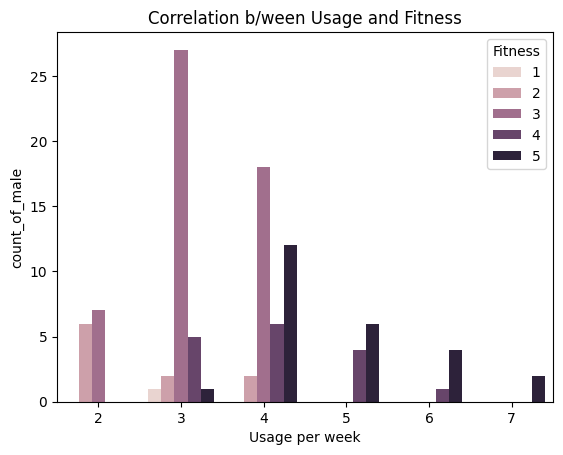

In [ ]:
sns.barplot(data = Number_of_male, x = 'Usage', y = 'count_of_male', hue = 'Fitness')
plt.xlabel("Usage per week")
plt.title("Correlation b/ween Usage and Fitness")


(ii) Count of Female consumers based on Usage and fitness levels

(Correlation between Usage and Fitness)

In [ ]:
Number_of_female = df[df['Gender'] == 'Female'].groupby(['Usage', 'Fitness'])['Gender'].count().reset_index(name = 'count_of_Female')
Number_of_female

,Usage,Fitness,count_of_Female
0,2,1,1
1,2,2,8
2,2,3,11
3,3,2,8
4,3,3,20
5,3,4,5
6,4,3,12
7,4,4,1
8,4,5,1
9,5,3,2


Text(0.5, 1.0, 'Correlation b/ween Usage and Fitness')

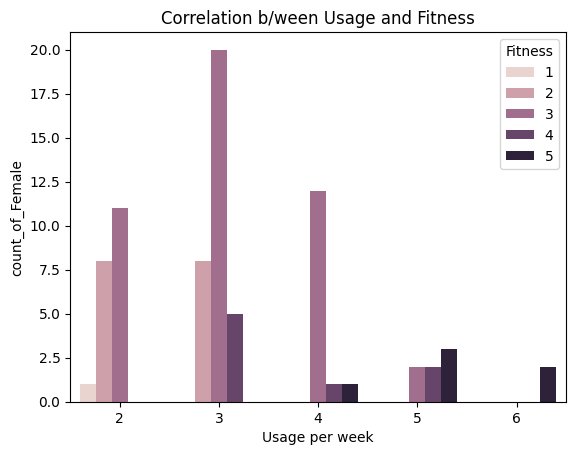

In [ ]:
sns.barplot(data = Number_of_female, x = 'Usage', y = 'count_of_Female', hue = 'Fitness')
plt.xlabel("Usage per week")
plt.title("Correlation b/ween Usage and Fitness")

**Insight :** (Male) On an average most males are using the treadmills for approx 3 times a week, and among them a significant percent of people have a general fitness level of 3. But, interestingly the usage times for people who have high fitnes levels like 4 and 5 are distributed from 3 to 7. And in that majority of very fit people are just using the traeadmill for just four times per week.

(Female) On an average most Females are using the treadmills for approx 3 times a week, and among them a significant percent of ladies have a general fitness level of 3. And coming to high end fit people, they are on an average using tradmills 4 to 6 times per week.

**Recommednation:** If any customer enquires about the general usage limit per week, then we can suggest that for an averag fit individual, 3 times weekly usage is recommednatory and for ultra fit people, a usage of 5 to 6 times is recommended.

Categorization of consumers based on Fitness and Product

(i) Count of male consumers based on each Product type and fitness levels

(Correlation between Product and Fitness)

In [ ]:
Number_of_Male = df[df['Gender'] == 'Male'].groupby(['Product','Fitness'])['Gender'].count().reset_index(name = 'count_of_Male')
Number_of_Male

,Product,Fitness,count_of_Male
0,KP281,1,1
1,KP281,2,4
2,KP281,3,28
3,KP281,4,6
4,KP281,5,1
5,KP481,2,6
6,KP481,3,21
7,KP481,4,4
8,KP781,3,3
9,KP781,4,6


Text(0.5, 1.0, 'Correlation b/ween Product and Fitness')

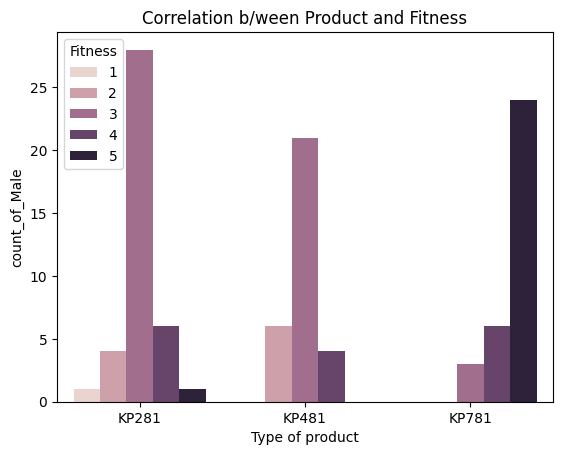

In [ ]:
sns.barplot(data = Number_of_Male, x = 'Product', y = 'count_of_Male', hue = 'Fitness')
plt.xlabel("Type of product")
plt.title("Correlation b/ween Product and Fitness")

(ii) Count of Female consumers based on each Product type and fitness levels

(Correlation between Product and Fitness)

In [ ]:
Number_of_Female = df[df['Gender'] == 'Female'].groupby(['Product','Fitness'])['Gender'].count().reset_index(name = 'count_of_Female')
Number_of_Female

,Product,Fitness,count_of_Female
0,KP281,2,10
1,KP281,3,26
2,KP281,4,3
3,KP281,5,1
4,KP481,1,1
5,KP481,2,6
6,KP481,3,18
7,KP481,4,4
8,KP781,3,1
9,KP781,4,1


Text(0.5, 1.0, 'Correlation b/ween Product and Fitness')

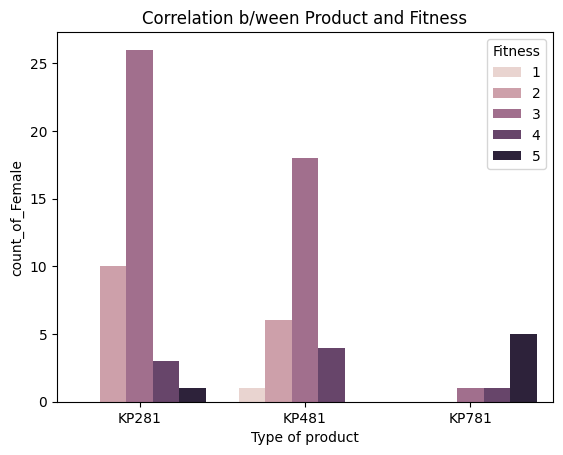

In [ ]:
sns.barplot(data = Number_of_Female , x = 'Product', y = 'count_of_Female', hue = 'Fitness')
plt.xlabel("Type of product")
plt.title("Correlation b/ween Product and Fitness")

**Insight :** (Male) Most males who have a fitness levels of 3 using the KP281, KP481 treadmill models and people who have very high fitnes levels like 4 and 5 are using KP781 model. Some exceptions are always there and some people who are even ultra fit people are also using basic models.

(Female) Even same is happening with females, most female who have a fitness of 3, are using more KP281 & KP481 models and some ultra fit poeple in females too are using the basic models instead of KP781.

**Recommednation:** Suggestion of type of model is always an individual desire of consumer and their budget etc. However if asked, recommending the models based on their fitness levels will sound more logical. Thus, KP281 AND KP481 models are for medium fit people or young teenagers, whereas KP781 will be more suited to an advanced athelte.

<<--------------------------------------------------------------------------->>

5. Finding correlation between multiple variables

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-53-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


Text(0.5, 1.0, 'correlation_matrix')

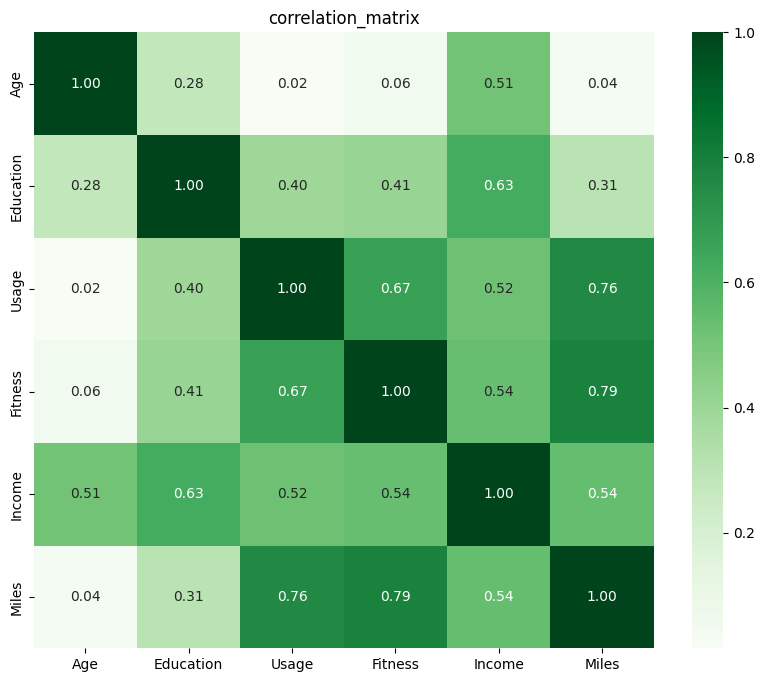

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = correlation_matrix, annot = True, cmap = "Greens", fmt = ".2f" )
plt.title("correlation_matrix")

Insight: (i) From the above heat map, we can infer lot of things but majorily by looking, we can observe that high correlation exists between variables like education-income, fitness-usage, usage/fitness - miles.

More education leads to more income and high fitness leads to more usage thus cultivating to more miles per week.


(ii) And low correlation exists for age/fitness - miles/usage

People who are aged and less fit will definitely use the machine low number of times and hence their miles run per week will also be the lowest.


<<--------------------------------------------------------------------------->>

In [ ]:
!pip install nbconvert

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Aerofit-Dataset@Dhanureddy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Aerofit-Dataset@Dhanureddy.ipynb to pdf
[NbConvertApp] Support files will be in Aerofit-Dataset@Dhanureddy_files/
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConvertApp] Making directory ./Aerofit-Dataset@Dhanureddy_files
[NbConve

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive
